MORDM OPTIMIZATION

In [12]:
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import ema_logging, MultiprocessingEvaluator, Scenario, HypervolumeMetric
from ema_workbench.em_framework.optimization import (ArchiveLogger, EpsilonProgress, to_problem)

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [13]:
model, planning_steps = get_model_for_problem_formulation(2)

#The model requires a reference scenario to "kick-start"
reference_scenario = Scenario('reference', **{'discount rate 0': 1.5,
                                              'discount rate 1': 1.5,
                                              'discount rate 2': 1.5,
                                              'A.0_ID flood wave shape': 75,
                                              'A.1_Bmax': 240,
                                              'A.1_pfail': 0.25,
                                              'A.1_Brate': 10,
                                              'A.2_Bmax': 240,
                                              'A.2_pfail': 0.25,
                                              'A.2_Brate': 10,
                                              'A.3_Bmax': 240,
                                              'A.3_pfail': 0.25,
                                              'A.3_Brate': 10,
                                              'A.4_Bmax': 240,
                                              'A.4_pfail': 0.25,
                                              'A.4_Brate': 10,
                                              'A.5_Bmax': 240,
                                              'A.5_pfail': 0.25,
                                              'A.5_Brate': 10})

In [14]:
convergence_metrics = [EpsilonProgress()]
nfe = 1000
epsilon = [0.5,0.5,0.5,0.01,0.01]

In [4]:
with MultiprocessingEvaluator(model) as evaluator:
    total = evaluator.optimize(nfe=nfe, searchover='levers', epsilons=epsilon,  convergence=convergence_metrics,reference=reference_scenario)

[MainProcess/INFO] pool started with 8 workers
11488it [19:40,  9.73it/s]                                                     
[MainProcess/INFO] optimization completed, found 429 solutions
[MainProcess/INFO] terminating pool


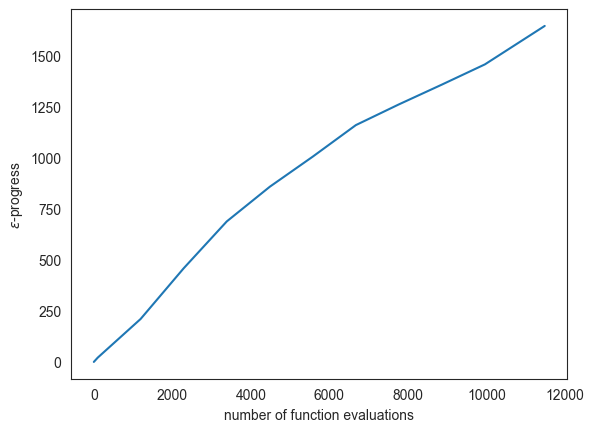

In [21]:
import matplotlib.pyplot as plt
import numpy as np
archive, convergence = total
fig, ax = plt.subplots()
ax.plot(convergence.nfe, convergence.epsilon_progress)
ax.set_ylabel('$\epsilon$-progress')

ax.set_xlabel('number of function evaluations')
plt.show()

In [6]:
from ema_workbench import save_results
archive, convergence = total
#save_results(total, 'MORDM_100k_ep0.25.tar.gz'.format(nfe))

/Users/juanita/Documents/GitHub/epa1361_open/Py310-MBDM/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


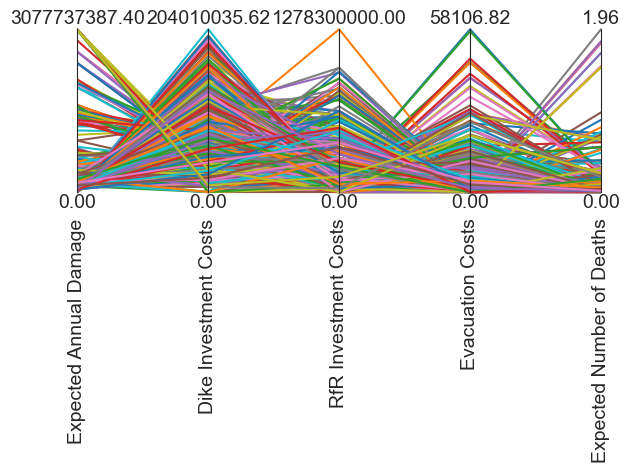

In [7]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [17]:
policies = archive[logical]
policies = policies.drop([o.name for o in model.outcomes], axis=1)
policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,sum_deaths
0,0,0,1,0,1,0,1,0,0,1,...,6,2,1,9,8,2,9,4,2,0.000000
1,0,0,0,0,0,1,1,1,1,1,...,5,4,10,2,5,0,3,2,1,0.000637
2,0,1,0,0,1,1,0,0,1,1,...,5,7,2,2,3,8,0,7,6,0.001361
3,0,0,1,0,1,0,0,0,1,0,...,2,0,8,6,0,0,2,3,8,0.000620
4,1,1,1,1,1,1,1,0,0,1,...,10,5,5,0,2,1,9,4,9,0.000991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,0,0,0,1,1,0,0,0,1,...,3,0,4,0,0,2,7,9,0,0.000454
216,0,1,0,0,0,0,1,0,0,0,...,1,0,6,9,7,0,7,7,2,0.004907
225,0,0,1,0,0,1,0,0,0,0,...,3,1,7,5,3,5,10,9,8,0.000000
226,1,0,0,1,0,0,1,1,1,0,...,6,0,6,7,2,3,0,0,6,0.001288


In [16]:
convergence_metrics = [
    ArchiveLogger(
        "./MORDM_Data",
        [l.name for l in model.levers],
        [o.name for o in model.outcomes],
        base_filename="MORDM_HV_1.tar.gz",
    ),
    EpsilonProgress(),
]

with MultiprocessingEvaluator(model) as evaluator:
    results, convergence = evaluator.optimize(nfe=nfe, searchover='levers', epsilons=epsilon,  convergence=convergence_metrics,reference=reference_scenario)


 99%|██████████████████████████████████████▋| 993/1000 [01:38<00:00, 10.27it/s]
1093it [01:47, 10.18it/s]                                                      
[MainProcess/INFO] optimization completed, found 68 solutions


In [17]:
archives = ArchiveLogger.load_archives("./MORDM_Data/MORDM_HV_1.tar.gz")

In [20]:
reference_set = results
problem = to_problem(model, searchover="levers")

hv = HypervolumeMetric(reference_set, problem)

hypervolume = [(nfe, hv.calculate(archive)) for nfe, archive in archives.items()]
hypervolume.sort(key=lambda x:x[0])
hypervolume = np.asarray(hypervolume)

AttributeError: 'Pandas' object has no attribute '0_RfR 0'

NameError: name 'hypervolume' is not defined

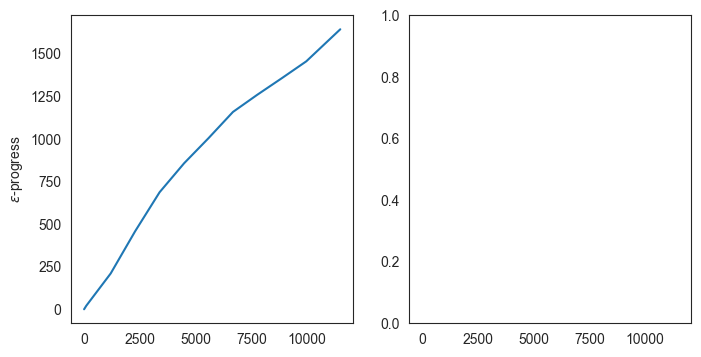

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(hypervolume[:, 0], hypervolume[:, 1])
ax2.set_ylim(ymin=0)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

In [ ]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

Filtering the found solutions to those that are most important for the Delta Commission.

In [ ]:
archive['deaths'] = archive['Expected Number of Deaths']
logical = archive[archive.deaths < 0.001]

In [ ]:
from ema_workbench.analysis import parcoords

data = logical.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()